In [1]:
from google.colab import files

uploaded = files.upload()


Saving ushape.csv to ushape.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:


df = pd.read_csv('ushape.csv')
df.head()


,x1,x2,label
0,0.1,0.10,0
1,0.2,0.10,0
2,0.3,0.15,0
3,0.4,0.25,0
4,0.5,0.40,0


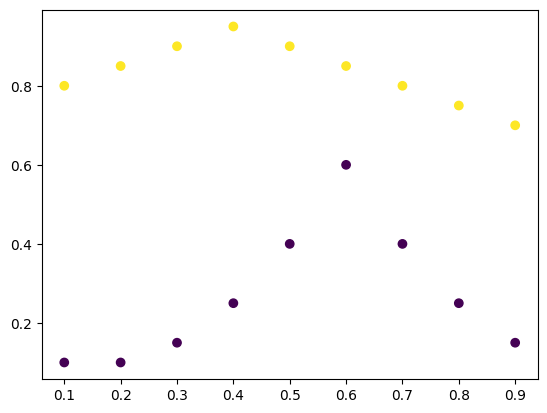

In [4]:
plt.scatter(df['x1'] ,df['x2'],c=df['label'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2 , kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
initial_weights = model.get_weights()

In [9]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.6038 - val_accuracy: 0.2500 - val_loss: 0.7658
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.5957 - val_accuracy: 0.0000e+00 - val_loss: 0.8054
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 0.5882 - val_accuracy: 0.0000e+00 - val_loss: 0.8449
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.5814 - val_accuracy: 0.0000e+00 - val_loss: 0.8835
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9286 - loss: 0.5749 - val_accuracy: 0.0000e+00 - val_loss: 0.9197
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9286 - loss: 0.5687 - val_accuracy: 0.0000e+00 - val_loss: 0.9522
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8571 - loss: 0.5630 - val_accuracy: 0.0000e+00 - val_loss: 0.9800
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8571 - loss: 0.5576 - val

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

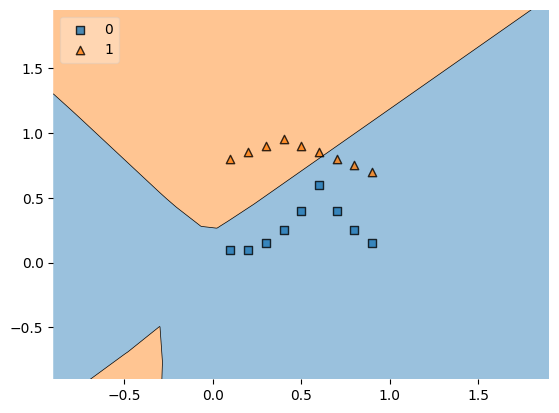

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model, legend = 2)